<a href="https://colab.research.google.com/github/rahulrajpr/TensorFlowDeveloperCertifcateTraining/blob/TransferLearning/TransferLearning_FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import clear_output

!pip install tensorflow==2.9.0
clear_output()
import tensorflow as tf
tf.__version__

'2.9.0'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpim
import warnings 
import os

warnings.filterwarnings('ignore')

> Downloding the helperfunctions.py for user-defined functions aceess

In [ ]:
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-02-15 14:27:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-15 14:27:13 (82.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



> Importing the user defined helper functons

In [ ]:
from helper_functions import unzip_data,walk_through_dir,plot_loss_curves,create_tensorboard_callback

> Get the dataset downloaded and unzipped

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data('10_food_classes_10_percent.zip')

--2023-02-15 14:27:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.218.128, 173.194.216.128, 74.125.26.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.218.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   198MB/s    in 0.8s    

2023-02-15 14:27:15 (198 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



> Lest have a walkthrough in the directory

In [ ]:
walk_through_dir('10_food_classes_10_percent')

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent

> Lets make the directories

In [ ]:
train_data_10_percent_dir = '10_food_classes_10_percent/train'
test_data_dir = '10_food_classes_10_percent/test'

> Load the images of train and test using the tf.keras.preprocessing.image_dataset_from_directory

In [ ]:
# define the global varibles 

IMG_SIZE = (224,224)

BATCH_SIZE = 32

In [ ]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_data_10_percent_dir,
                                                                            image_size = IMG_SIZE,
                                                                            batch_size = BATCH_SIZE,
                                                                            label_mode = 'categorical',
                                                                            seed = 42)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory = test_data_dir,
                                                                image_size = IMG_SIZE,
                                                                batch_size = BATCH_SIZE,
                                                                label_mode = 'categorical',
                                                                seed = 42)  

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


> Lets explore some of the attributes of the batch dataset from tensorflow

In [ ]:
classes = train_data_10_percent.class_names
classes

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
num_classes = len(classes)

num_classes

10

In [ ]:
train_data_10_percent.take(1) # accesing one of the batch in the dataset

<TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
for images,labels in train_data_10_percent.take(1):

  print(images,labels)

tf.Tensor(
[[[[1.10000000e+02 6.32397957e+01 0.00000000e+00]
   [1.18780609e+02 7.49744949e+01 7.37755108e+00]
   [1.06168365e+02 6.54438782e+01 1.02551079e+00]
   ...
   [9.51429443e+01 5.70000000e+01 2.21426392e+00]
   [1.04714348e+02 6.15000267e+01 8.57146740e+00]
   [1.10357109e+02 6.33571091e+01 9.35710812e+00]]

  [[1.14693878e+02 7.08877563e+01 4.36224604e+00]
   [1.14423470e+02 7.30051041e+01 7.14285660e+00]
   [1.10346939e+02 7.12346954e+01 6.29081631e+00]
   ...
   [9.44694366e+01 5.59285736e+01 1.34179497e+00]
   [1.00285751e+02 5.70714264e+01 4.14286995e+00]
   [1.07311264e+02 5.74490089e+01 4.40309334e+00]]

  [[1.07239792e+02 6.82346954e+01 7.65306503e-02]
   [1.13382652e+02 7.48112259e+01 7.59694004e+00]
   [1.13469383e+02 7.48520432e+01 9.94387722e+00]
   ...
   [9.81888351e+01 5.96173630e+01 5.04589176e+00]
   [1.02857155e+02 5.68571548e+01 4.85715580e+00]
   [1.09576607e+02 5.95766068e+01 6.57660770e+00]]

  ...

  [[9.08060455e+01 6.93775177e+01 2.37751961e+00]
   [9

# Let do the model buidling usinng Keras Functional API

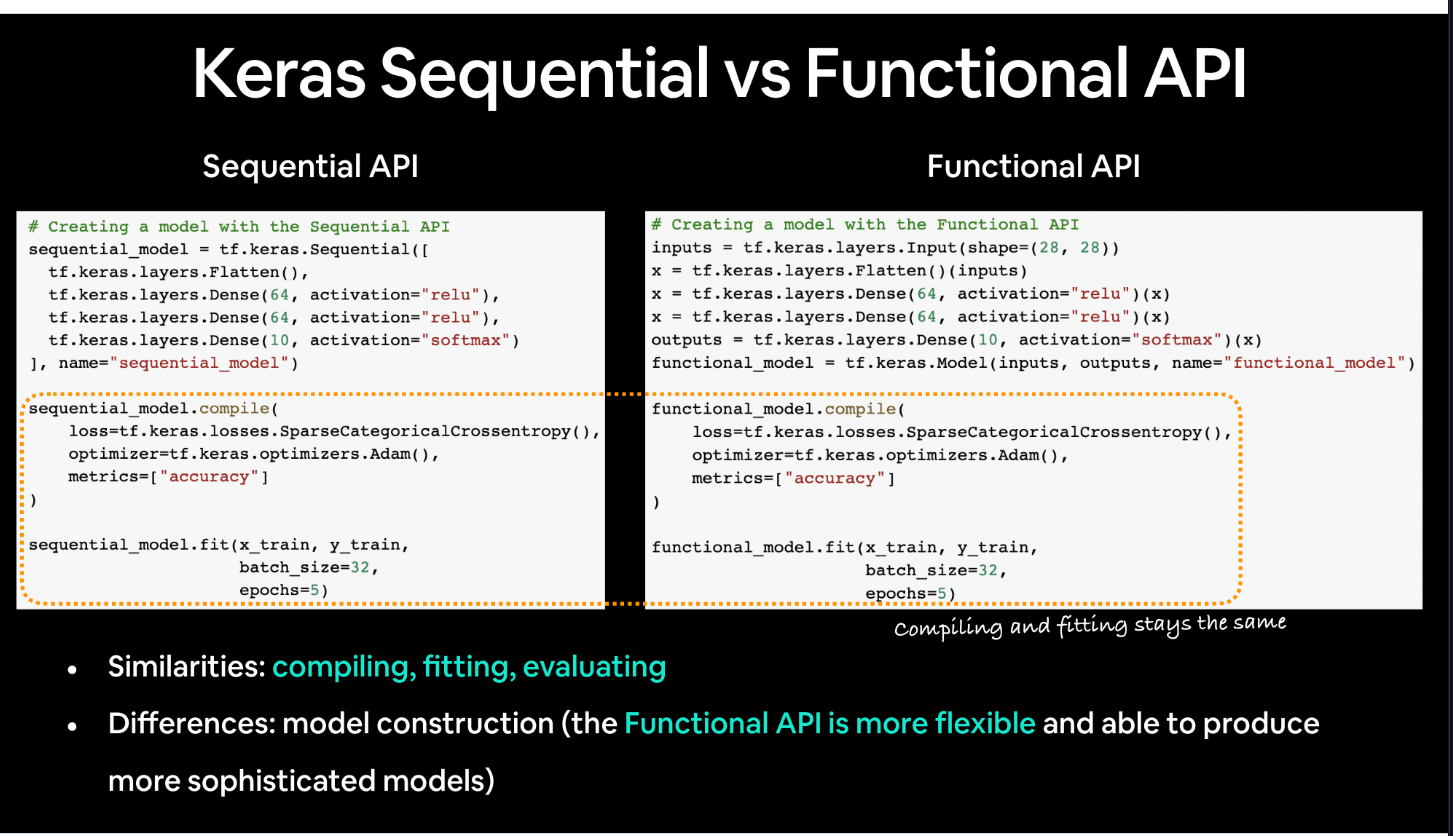

> The Mothod we are going to cover is feature extraction from pre-trained model from Keras.Applications

In [ ]:
tf.random.set_seed(42)

# Lets create the base model

base_model = tf.keras.applications.EfficientNetB0(include_top = False) # include_top means the to include own pooling layer and retun a vector

# in this particular case we want out efficient net to retun the matrix and later on we will use a costomized pooling layer in the model

base_model.trainable = False

# creating the input layer

inputs = tf.keras.layers.Input(shape = IMG_SIZE+(3,), name = 'input_layer')

# pass the input throgh the base model

x = base_model(inputs)

# create the pooling layer

x = tf.keras.layers.GlobalAveragePooling2D()(x)

# creating the output layer

outputs = tf.keras.layers.Dense(units = 10, activation = 'softmax')(x)

# assembling the model structure

model_0 = tf.keras.Model(inputs,outputs)

16705208/16705208 [==============================] - 0s 0us/step


> Compile and fit the model

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# compile the model

model_0.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# fit the model

history_0 = model_0.fit(train_data_10_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback(dir_name = 'tensorboard',
                                                     experiment_name = 'feature_extraction_keras_application_1')])

Saving TensorBoard log files to: tensorboard/feature_extraction_keras_application_1/20230215-142722
Epoch 1/5
24/24 [==============================] - 28s 596ms/step - loss: 1.9583 - accuracy: 0.3413 - val_loss: 1.3675 - val_accuracy: 0.6808
Epoch 2/5
24/24 [==============================] - 10s 392ms/step - loss: 1.1344 - accuracy: 0.7613 - val_loss: 0.9043 - val_accuracy: 0.8072
Epoch 3/5
24/24 [==============================] - 12s 517ms/step - loss: 0.8032 - accuracy: 0.8320 - val_loss: 0.7130 - val_accuracy: 0.8476
Epoch 4/5
24/24 [==============================] - 9s 354ms/step - loss: 0.6568 - accuracy: 0.8520 - val_loss: 0.6174 - val_accuracy: 0.8580
Epoch 5/5
24/24 [==============================] - 9s 386ms/step - loss: 0.5486 - accuracy: 0.8800 - val_loss: 0.5609 - val_accuracy: 0.8640


In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 6s 70ms/step - loss: 0.5609 - accuracy: 0.8640


[0.5609003305435181, 0.8640000224113464]

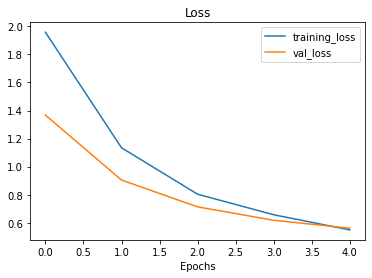

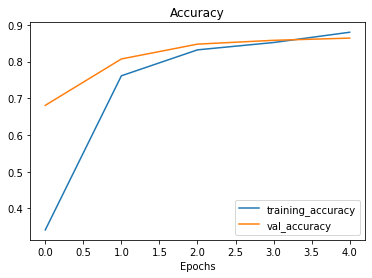

In [ ]:
plot_loss_curves(history_0)

Inference : seems like a very good model and may perform better we train the model with more number epochs

> Lest build model_1 (same as model_0) with high number of epochs

In [ ]:
tf.random.set_seed(42)

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = IMG_SIZE+(3,), name = 'input_shape')

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(units = num_classes, activation = 'softmax')(x)

model_1 = tf.keras.Model(inputs,outputs)

In [ ]:

model_1.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data_10_percent,
                        epochs = 10,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback(dir_name = 'tensorboard',
                                                     experiment_name = 'feature_extraction_keras_application_1')])

Saving TensorBoard log files to: tensorboard/feature_extraction_keras_application_1/20230215-142909
Epoch 1/10
24/24 [==============================] - 21s 576ms/step - loss: 1.9643 - accuracy: 0.3547 - val_loss: 1.3780 - val_accuracy: 0.6900
Epoch 2/10
24/24 [==============================] - 9s 382ms/step - loss: 1.1420 - accuracy: 0.7520 - val_loss: 0.9122 - val_accuracy: 0.8064
Epoch 3/10
24/24 [==============================] - 8s 311ms/step - loss: 0.8157 - accuracy: 0.8187 - val_loss: 0.7169 - val_accuracy: 0.8444
Epoch 4/10
24/24 [==============================] - 8s 310ms/step - loss: 0.6582 - accuracy: 0.8520 - val_loss: 0.6211 - val_accuracy: 0.8564
Epoch 5/10
24/24 [==============================] - 10s 403ms/step - loss: 0.5585 - accuracy: 0.8787 - val_loss: 0.5645 - val_accuracy: 0.8600
Epoch 6/10
24/24 [==============================] - 8s 311ms/step - loss: 0.4850 - accuracy: 0.9040 - val_loss: 0.5255 - val_accuracy: 0.8652
Epoch 7/10
24/24 [============================

In [ ]:
model_1.evaluate(test_data)

79/79 [==============================] - 10s 115ms/step - loss: 0.4432 - accuracy: 0.8784


[0.4431513547897339, 0.8784000277519226]

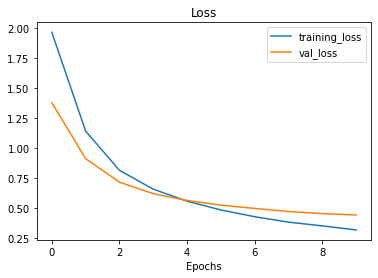

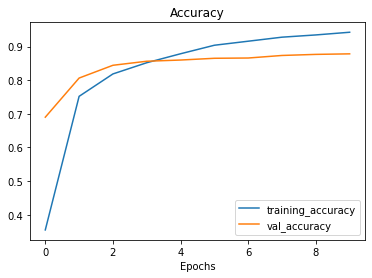

In [ ]:
plot_loss_curves(history_1)

# Replicate the model using the another pooling method - # GlobalMaxPooling2D

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape = IMG_SIZE+(3,), name = 'input_layer')

x = base_model(inputs)

x = tf.keras.layers.GlobalMaxPool2D()(x)

outputs = tf.keras.layers.Dense(units = num_classes, activation = 'softmax')(x)

model_2 = tf.keras.Model(inputs,outputs)

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data_10_percent,
                        epochs = 10,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = create_tensorboard_callback(dir_name = 'tensorboard',
                                                     experiment_name = 'feature_extraction_keras_application_2')
                        )

Saving TensorBoard log files to: tensorboard/feature_extraction_keras_application_2/20230215-143128
Epoch 1/10
24/24 [==============================] - 23s 529ms/step - loss: 3.6253 - accuracy: 0.2667 - val_loss: 2.2645 - val_accuracy: 0.4468
Epoch 2/10
24/24 [==============================] - 13s 551ms/step - loss: 1.4847 - accuracy: 0.5920 - val_loss: 1.2466 - val_accuracy: 0.6616
Epoch 3/10
24/24 [==============================] - 10s 423ms/step - loss: 0.9535 - accuracy: 0.7200 - val_loss: 1.0338 - val_accuracy: 0.7004
Epoch 4/10
24/24 [==============================] - 12s 485ms/step - loss: 0.6741 - accuracy: 0.7973 - val_loss: 0.9725 - val_accuracy: 0.7280
Epoch 5/10
24/24 [==============================] - 8s 325ms/step - loss: 0.5513 - accuracy: 0.8067 - val_loss: 0.8698 - val_accuracy: 0.7536
Epoch 6/10
24/24 [==============================] - 9s 357ms/step - loss: 0.4030 - accuracy: 0.8653 - val_loss: 0.8609 - val_accuracy: 0.7580
Epoch 7/10
24/24 [==========================

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 8s 102ms/step - loss: 0.8090 - accuracy: 0.7792


[0.8090221881866455, 0.77920001745224]

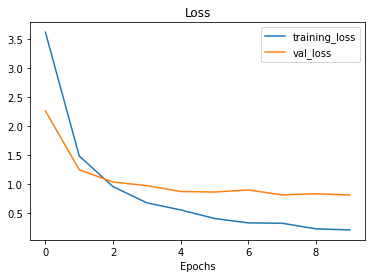

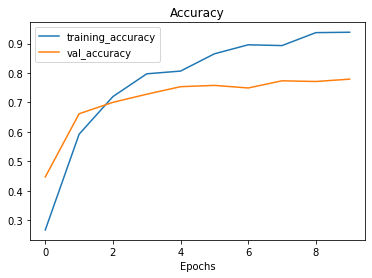

In [ ]:
plot_loss_curves(history_2)

Inference : GlobalAveregePool is doing better than GlobalMaxPool

**Include_top = False**

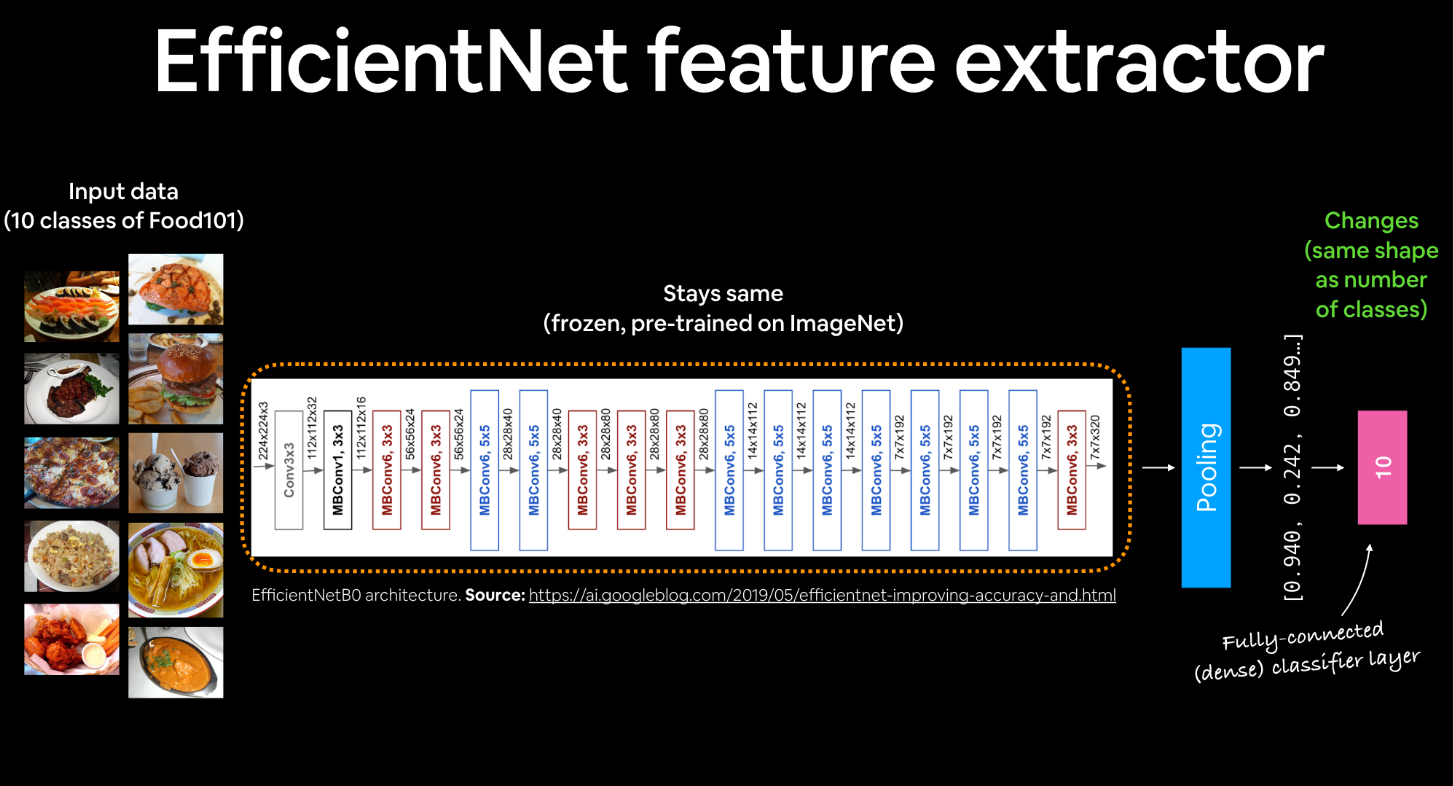

**Include_top = True**


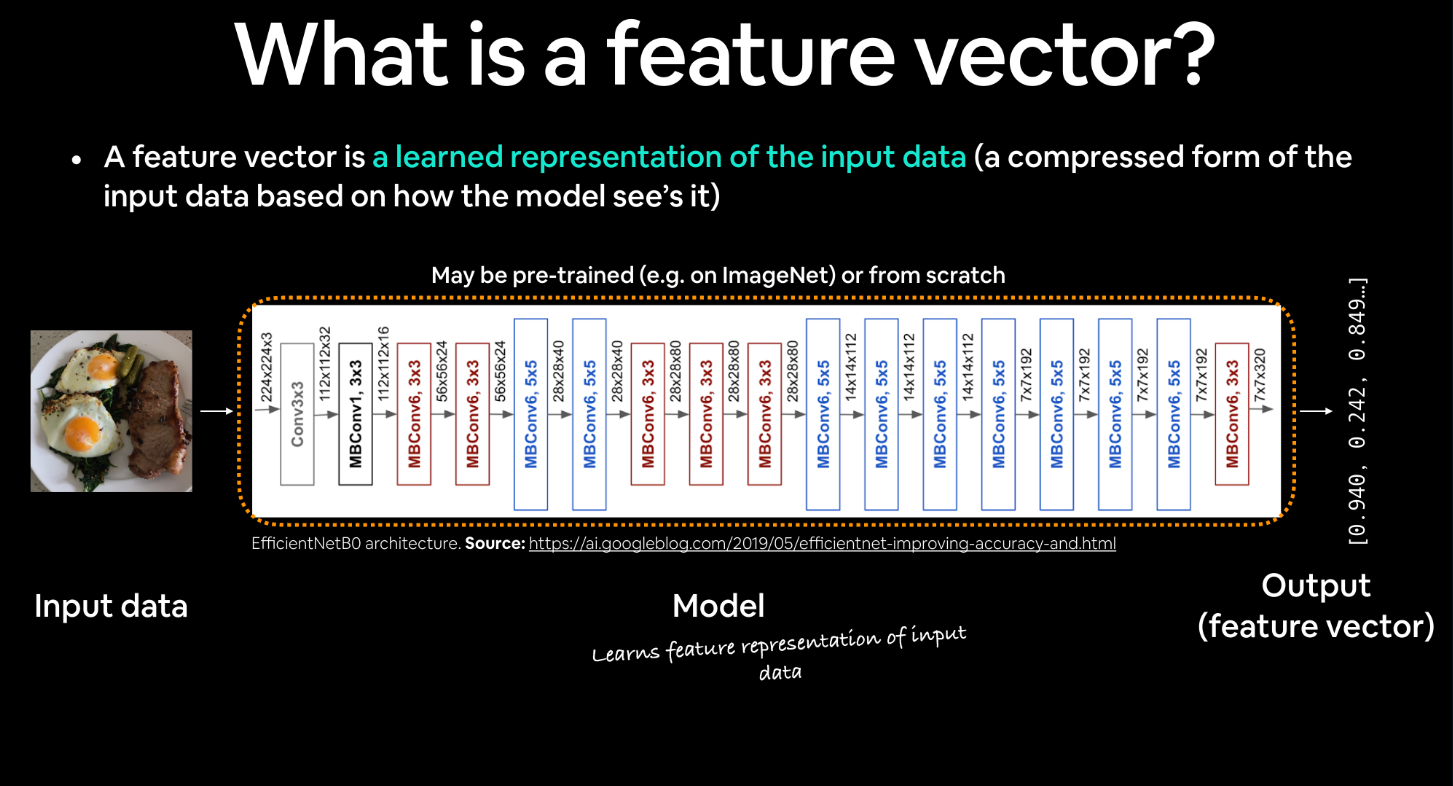

# Lets train the model in 1% of the data with data augmentation for the data diversity

In [ ]:
# download the data

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data(filename = '10_food_classes_1_percent.zip')


--2023-02-15 14:34:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.213.128, 173.194.217.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   248MB/s    in 0.5s    

2023-02-15 14:34:09 (248 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
walk_through_dir('10_food_classes_1_percent')

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There a

Note : we are training on just 7 images in each class

Lets create the batch dataset

In [ ]:
train_data_1_percent_dir = '10_food_classes_1_percent/train'

In [ ]:
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_data_1_percent_dir,
                                                                            label_mode = 'categorical',
                                                                            image_size = IMG_SIZE,
                                                                            batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.


> Approch 

- create a augmentation layer seperately using tf.keras.preprocessing. (experimental)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
augmentation_model = Sequential([
    layers.RandomRotation(0.2),
    layers.RandomFlip('horizontal'),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomZoom(0.2)
], name = 'augmentation_model')

In [ ]:
# build our model - augmeted images with 1% of the traing data

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.Input(shape = IMG_SIZE+(3,), name = 'input_layer')

x = augmentation_model(inputs) # addition of augmentation layer

x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(units = num_classes, activation = 'softmax')(x)

model_3 = tf.keras.Model(inputs,outputs)

model_3.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data_1_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_1_percent),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback(dir_name = 'tensorboard',
                                                                 experiment_name = 'feature_extraction_keras_application_3')])

Saving TensorBoard log files to: tensorboard/feature_extraction_keras_application_3/20230215-143413
Epoch 1/5
3/3 [==============================] - 17s 4s/step - loss: 2.3457 - accuracy: 0.1286 - val_loss: 2.2508 - val_accuracy: 0.1488
Epoch 2/5
3/3 [==============================] - 9s 4s/step - loss: 2.1112 - accuracy: 0.3143 - val_loss: 2.1282 - val_accuracy: 0.2284
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.9343 - accuracy: 0.3857 - val_loss: 2.0197 - val_accuracy: 0.3060
Epoch 4/5
3/3 [==============================] - 11s 5s/step - loss: 1.7741 - accuracy: 0.5714 - val_loss: 1.9180 - val_accuracy: 0.3684
Epoch 5/5
3/3 [==============================] - 9s 4s/step - loss: 1.6686 - accuracy: 0.5000 - val_loss: 1.8249 - val_accuracy: 0.4360


Evaluate the model

In [ ]:
model_3.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 1.8249 - accuracy: 0.4360


[1.8248640298843384, 0.4359999895095825]

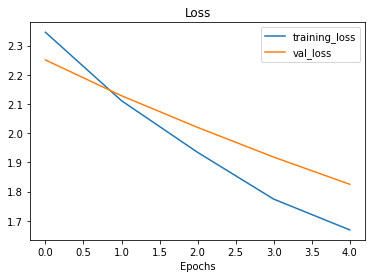

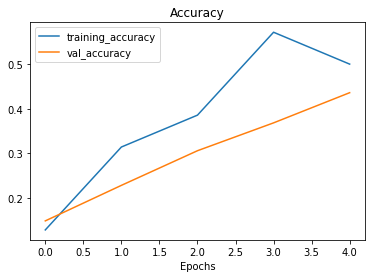

In [ ]:
plot_loss_curves(history_3)

# Lets train the model 3 on the 10% of the training data

In [ ]:
train_dir = '10_food_classes_10_percent/train'

In [ ]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                            label_mode = 'categorical',
                                                                            image_size = IMG_SIZE,
                                                                            batch_size = BATCH_SIZE)

Found 750 files belonging to 10 classes.


In [ ]:
augmentation_model = Sequential([
    layers.RandomRotation(0.2),
    layers.RandomFlip('horizontal'),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomZoom(0.2)
], name = 'augmentation_model')

In [ ]:
# create a checkpoint callback

checkpoint_path_model_4 = 'ten_percent_model_checkpoint/checkpoints_model2.ckpt'

checkpoint_callback_model_4 = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path_model_4,
                                                         save_weight_only = True,
                                                         save_best_only = False)

In [ ]:
# build our model - augmeted images with 1% of the traing data

base_model = tf.keras.applications.EfficientNetB0(include_top = False)
base_model.trainable = False

inputs = tf.keras.Input(shape = IMG_SIZE+(3,), name = 'input_layer')

x = augmentation_model(inputs) # addition of augmentation layer

x = base_model(x)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(units = num_classes, activation = 'softmax')(x)

model_4 = tf.keras.Model(inputs,outputs)

model_4.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

history_4 = model_4.fit(train_data_10_percent,
                        epochs = 5,
                        steps_per_epoch = len(train_data_10_percent),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        callbacks = [create_tensorboard_callback(dir_name = 'tensorboard',
                                                                 experiment_name = 'feature_extraction_keras_application_3'),checkpoint_callback_model_4
                                     ])

Saving TensorBoard log files to: tensorboard/feature_extraction_keras_application_3/20230215-143523
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9727 - accuracy: 0.3627

24/24 [==============================] - 68s 3s/step - loss: 1.9727 - accuracy: 0.3627 - val_loss: 1.4480 - val_accuracy: 0.6668
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3197 - accuracy: 0.6907

24/24 [==============================] - 62s 3s/step - loss: 1.3197 - accuracy: 0.6907 - val_loss: 1.0001 - val_accuracy: 0.7888
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0227 - accuracy: 0.7453

24/24 [==============================] - 59s 3s/step - loss: 1.0227 - accuracy: 0.7453 - val_loss: 0.8059 - val_accuracy: 0.8192
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8518 - accuracy: 0.7947

24/24 [==============================] - 57s 2s/step - loss: 0.8518 - accuracy: 0.7947 - val_loss: 0.6939 - val_accuracy: 0.8332
Epoch 5/5
24/24 [==============================] - ETA: 0s - loss: 0.7653 - accuracy: 0.8227

24/24 [==============================] - 55s 2s/step - loss: 0.7653 - accuracy: 0.8227 - val_loss: 0.6374 - val_accuracy: 0.8328


In [ ]:
model_4_result = model_4.evaluate(test_data)
model_4_result

79/79 [==============================] - 8s 96ms/step - loss: 0.6374 - accuracy: 0.8328


[0.6373745799064636, 0.8327999711036682]

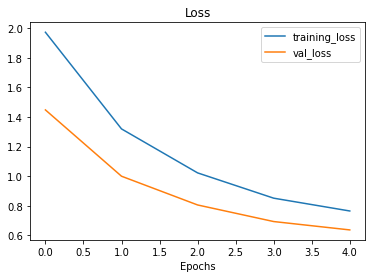

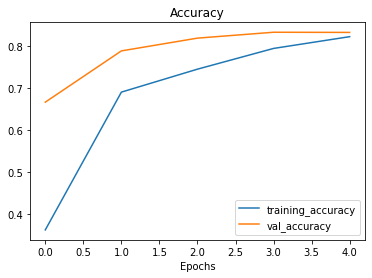

In [ ]:
plot_loss_curves(history_4)

In [ ]:
checkpoint_path_model_4

'ten_percent_model_checkpoint/checkpoints_model2.ckpt'

Try loading the weights from the checkpoints and see how it gets evaluavated

In [ ]:
# loading the saved weights from a checkpoint file to a model

model_4.load_weights(checkpoint_path_model_4)

In [ ]:
model_4_results_loaded_weights = model_4.evaluate(test_data)
model_4_results_loaded_weights

79/79 [==============================] - 6s 70ms/step - loss: 0.6374 - accuracy: 0.8328


[0.6373745799064636, 0.8327999711036682]

Lets compare the model 4 result directly and model4 loaded with the weights from the chcekpoints created

In [ ]:
print(model_4_result)
print(model_4_results_loaded_weights)

[0.6373745799064636, 0.8327999711036682]
[0.6373745799064636, 0.8327999711036682]


In [ ]:
model_4_result == model_4_results_loaded_weights

True

You can see that model_4 and model_4 loaded weights from the checkpint are different 

lets check if it is due the number storing precision

In [ ]:
np.isclose(np.array(model_4_result), np.array(model_4_results_loaded_weights))

array([ True,  True])

seems like theay are very very close, so it due to the precison

lets check how different is those numbers are

In [ ]:
np.array(model_4_result) - np.array(model_4_results_loaded_weights)

array([0., 0.])

See that the difference is very very very neglegable

# Lets fine tune the transfer learning model on 10% on the training data

 - load the weight of the prev model
 - tweak only the base model
 - fit the model prev model with data



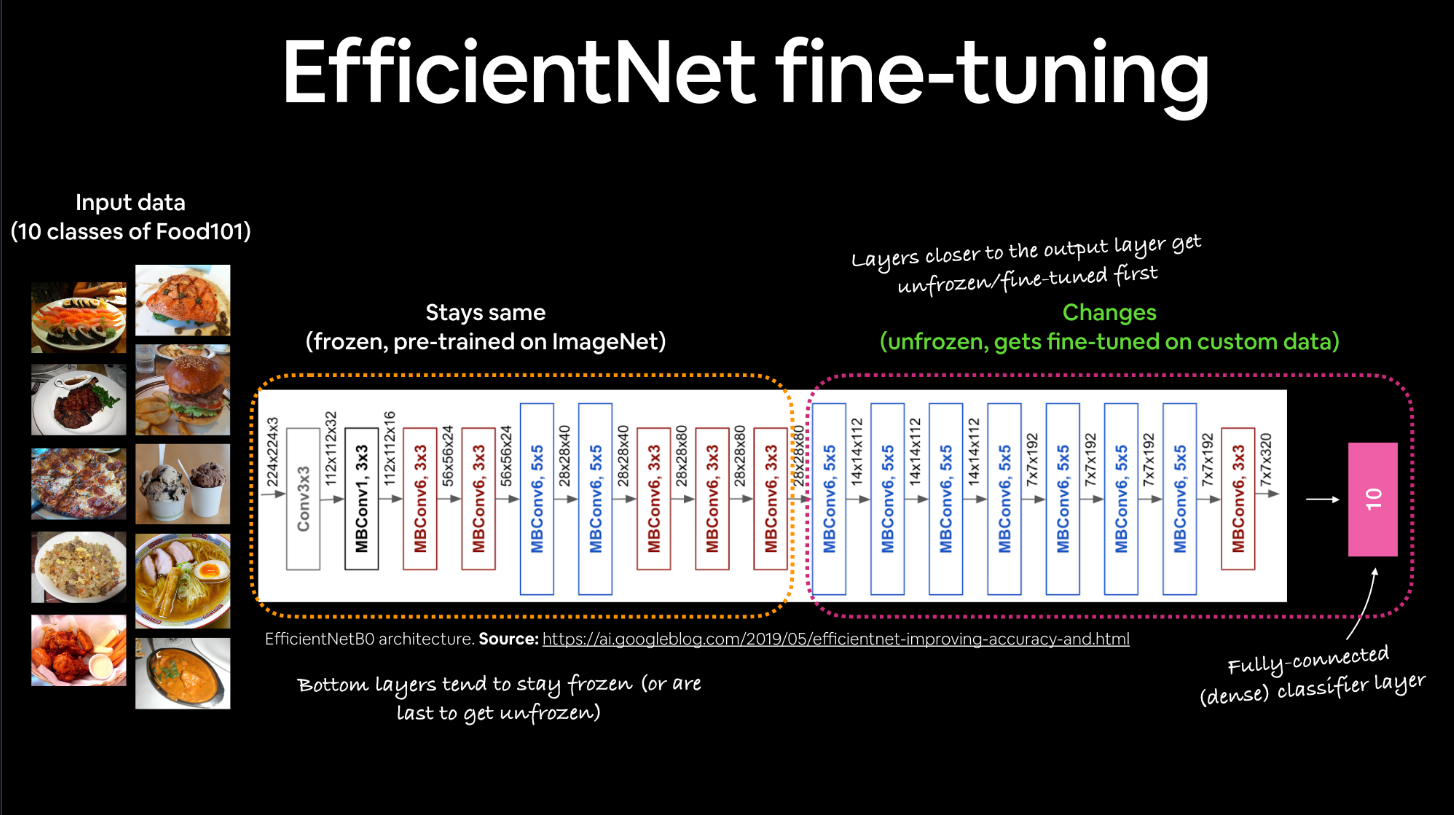

> Lets inspect the layers in the model 4

In [ ]:
model_4.layers

In [ ]:
for layer in model_4.layers:  
  print(layer.name, layer.trainable)

input_layer True
augmentation_model True
efficientnetb0 False
global_average_pooling2d_3 True
dense_4 True


The objectives is to make some of the layers in the base model is trainable

lets inspect the inner layers of the base model

In [ ]:
for ind,in_layer in enumerate(model_4.layers[2].layers):

  print(ind,in_layer.name, in_layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 tf.math.truediv_4 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
len(model_4.layers[2].trainable_variables)

0

> lets create fine tuned model 4 by making the base model layers trainable

In [ ]:
initial_epochs = 5

fine_tune_epoch = initial_epochs + 5

In [ ]:
# create a checkpoint callback

checkpoint_path_model_4_tuned = 'ten_percent_model_checkpoint/checkpoints_model2.ckpt'

checkpoint_callback_model_4_tuned = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path_model_4_tuned,
                                                         save_weight_only = True,
                                                         save_best_only = False)

In [ ]:
base_model.trainable = True # manking every layer trainable

for layer in base_model.layers[:-10]: # Freezing (not trainable) the all the layers except the last 10 layers (those layers through data pass first)
  layer.trainable = False

# if we change anythig in the model layers, the model needs to recompiled

model_4.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(learning_rate = 0.0001), # since the base model is trainable, we are reducing the learnin rate by 10% as the model should not learn too much and be overfit
                metrics = ['accuracy']) 


# the model is re_trained on the fine-tuned model with loaded patterns into the model from the callback-instance

history_4_fine_tuned = model_4.fit(train_data_10_percent,
                                   epochs = fine_tune_epoch, # total of 10 epochs, initial epoch has alredy been trained in the prev model
                                   initial_epoch = history_4.epoch[-1], # initial epoch has to start last epoch of the model traing.
                                   steps_per_epoch = len(train_data_10_percent),
                                   
                                   validation_data = test_data,
                                   validation_steps = len(test_data),
                                   callbacks = [create_tensorboard_callback(dir_name = 'tensorboard',
                                                                 experiment_name = 'feature_extraction_keras_application_5'),checkpoint_callback_model_4_tuned])

Saving TensorBoard log files to: tensorboard/feature_extraction_keras_application_5/20230215-144213
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.8386 - accuracy: 0.7840

24/24 [==============================] - 67s 3s/step - loss: 0.8386 - accuracy: 0.7840 - val_loss: 0.5605 - val_accuracy: 0.8428
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.6800 - accuracy: 0.8187

24/24 [==============================] - 57s 2s/step - loss: 0.6800 - accuracy: 0.8187 - val_loss: 0.5171 - val_accuracy: 0.8504
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.6107 - accuracy: 0.8467

24/24 [==============================] - 57s 2s/step - loss: 0.6107 - accuracy: 0.8467 - val_loss: 0.4911 - val_accuracy: 0.8548
Epoch 8/10
24/24 [==============================] - ETA: 0s - loss: 0.5487 - accuracy: 0.8547

24/24 [==============================] - 56s 2s/step - loss: 0.5487 - accuracy: 0.8547 - val_loss: 0.4677 - val_accuracy: 0.8588
Epoch 9/10
24/24 [==============================] - ETA: 0s - loss: 0.5025 - accuracy: 0.8840

24/24 [==============================] - 57s 2s/step - loss: 0.5025 - accuracy: 0.8840 - val_loss: 0.4508 - val_accuracy: 0.8628
Epoch 10/10
24/24 [==============================] - ETA: 0s - loss: 0.4467 - accuracy: 0.8840

24/24 [==============================] - 58s 2s/step - loss: 0.4467 - accuracy: 0.8840 - val_loss: 0.4411 - val_accuracy: 0.8636


In [ ]:
from helper_functions import compare_historys

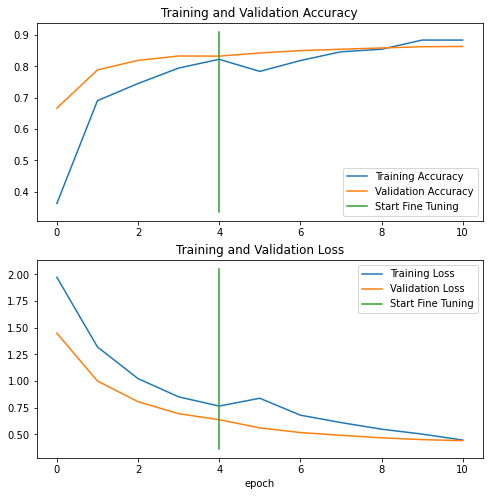

In [ ]:
compare_historys(original_history = history_4,
                 new_history = history_4_fine_tuned,
                 initial_epochs = initial_epochs)

In [ ]:
model_4_finetuned_reult = model_4.evaluate(test_data)

print(model_4_result)
print(model_4_finetuned_reult)

79/79 [==============================] - 6s 70ms/step - loss: 0.4411 - accuracy: 0.8636
[0.6373745799064636, 0.8327999711036682]
[0.44110938906669617, 0.8636000156402588]


# Lets do the experiment in the full dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

unzip_data('10_food_classes_all_data.zip')

--2023-02-15 14:48:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.193.128, 172.217.203.128, 142.250.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   202MB/s    in 2.4s    

2023-02-15 14:48:35 (202 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
walk_through_dir('10_food_classes_all_data')

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [ ]:
train_dir_full_data = '10_food_classes_all_data/train'

In [ ]:
train_full_data = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir_full_data,
                                                                      label_mode = 'categorical',
                                                                      image_size = IMG_SIZE,
                                                                      batch_size = BATCH_SIZE)

Found 7500 files belonging to 10 classes.


In [ ]:
model_4.load_weights(checkpoint_path_model_4)

In [ ]:
for layer_num, layer in enumerate(model_4.layers):
  print(layer_num, layer.name, layer.trainable)

0 input_layer True
1 augmentation_model True
2 efficientnetb0 True
3 global_average_pooling2d_3 True
4 dense_4 True


In [ ]:
for layer_num, layer in enumerate(model_4.layers[2].layers):
  print(layer_num, layer.name, layer.trainable)

0 input_5 False
1 rescaling_4 False
2 normalization_4 False
3 tf.math.truediv_4 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

Compile and fit on the full data

In [ ]:

checkpoint_path_model_4_tuned_fulldata = 'ten_percent_model_checkpoint/checkpoints_model3.ckpt'

checkpoint_callback_model_4_tuned_full_data = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path_model_4_tuned_fulldata,
                                                         save_weight_only = True,
                                                         save_best_only = False)

In [ ]:
initial_epochs = 5

fine_tune_epoch = initial_epochs + 5

In [ ]:
model_4.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(learning_rate = 0.0001), # since the base model is trainable, we are reducing the learnin rate by 10% as the model should not learn too much and be overfit
                metrics = ['accuracy']) 


# the model is re_trained on the fine-tuned model with loaded patterns into the model from the callback-instance

history_4_fine_tuned_full_data = model_4.fit(train_full_data,
                                   epochs = fine_tune_epoch, # total of 10 epochs, initial epoch has alredy been trained in the prev model
                                   initial_epoch = history_4.epoch[-1], # initial epoch has to start last epoch of the model traing.
                                   steps_per_epoch = len(train_full_data),
                                   
                                   validation_data = test_data,
                                   validation_steps = int(0.25*len(test_data)),
                                   callbacks = [create_tensorboard_callback(dir_name = 'tensorboard',
                                                                 experiment_name = 'feature_extraction_keras_application_6'),checkpoint_callback_model_4_tuned_full_data])

Saving TensorBoard log files to: tensorboard/feature_extraction_keras_application_6/20230215-144843
Epoch 5/10
235/235 [==============================] - ETA: 0s - loss: 0.6515 - accuracy: 0.7924

235/235 [==============================] - 110s 435ms/step - loss: 0.6515 - accuracy: 0.7924 - val_loss: 0.3084 - val_accuracy: 0.9046
Epoch 6/10
235/235 [==============================] - ETA: 0s - loss: 0.5463 - accuracy: 0.8329

235/235 [==============================] - 99s 420ms/step - loss: 0.5463 - accuracy: 0.8329 - val_loss: 0.3067 - val_accuracy: 0.9013
Epoch 7/10
235/235 [==============================] - ETA: 0s - loss: 0.4926 - accuracy: 0.8423

235/235 [==============================] - 96s 406ms/step - loss: 0.4926 - accuracy: 0.8423 - val_loss: 0.2835 - val_accuracy: 0.9112
Epoch 8/10
235/235 [==============================] - ETA: 0s - loss: 0.4472 - accuracy: 0.8599

235/235 [==============================] - 97s 413ms/step - loss: 0.4472 - accuracy: 0.8599 - val_loss: 0.2226 - val_accuracy: 0.9276
Epoch 9/10
235/235 [==============================] - ETA: 0s - loss: 0.4167 - accuracy: 0.8712

235/235 [==============================] - 91s 386ms/step - loss: 0.4167 - accuracy: 0.8712 - val_loss: 0.2311 - val_accuracy: 0.9326
Epoch 10/10
235/235 [==============================] - ETA: 0s - loss: 0.3986 - accuracy: 0.8747

235/235 [==============================] - 89s 379ms/step - loss: 0.3986 - accuracy: 0.8747 - val_loss: 0.2301 - val_accuracy: 0.9359


In [ ]:
model_4.evaluate(test_data)

79/79 [==============================] - 6s 76ms/step - loss: 0.2517 - accuracy: 0.9176


[0.2517373859882355, 0.9175999760627747]

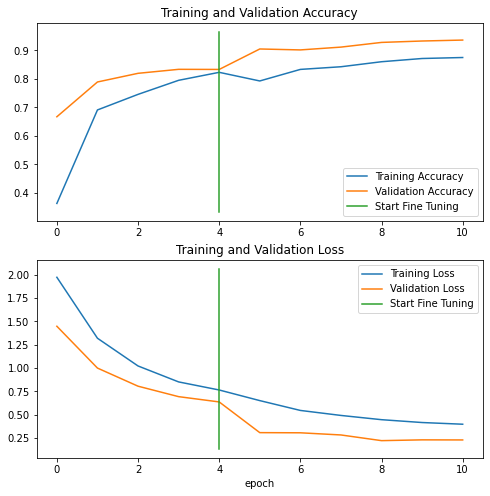

In [ ]:
compare_historys(original_history = history_4,
                 new_history = history_4_fine_tuned_full_data,
                 initial_epochs = initial_epochs)

In [ ]:
# !tensorboard dev upload --logdir 'tensorboard' \
# --name 'TransferLearning'\
# --description 'test' \
# --one_shot

In [ ]:
# !tensorboard dev list

In [ ]:
#!tensorboard dev delete --experiment_id 5Br4PvF5TjiRzrGGU22czQ

Lets See all the result in cell

In [ ]:
print('model 0 : ',model_0.evaluate(test_data))
print('model 1 : ',model_1.evaluate(test_data))
print('model 2 : ',model_2.evaluate(test_data))
print('model 3 : ',model_3.evaluate(test_data))

model_4.load_weights(checkpoint_path_model_4)
print('model 4 : ',model_4.evaluate(test_data))

model_4.load_weights(checkpoint_path_model_4_tuned)
print('model 4_finetuned : ',model_4.evaluate(test_data))

model_4.load_weights(checkpoint_path_model_4_tuned_fulldata)
print('model 4_finetuned - fulldata : ',model_4.evaluate(test_data))

79/79 [==============================] - 8s 69ms/step - loss: 0.5609 - accuracy: 0.8640
model 0 :  [0.5609002709388733, 0.8640000224113464]
79/79 [==============================] - 8s 92ms/step - loss: 0.4432 - accuracy: 0.8784
model 1 :  [0.4431513547897339, 0.8784000277519226]
79/79 [==============================] - 6s 72ms/step - loss: 0.8090 - accuracy: 0.7792
model 2 :  [0.8090221881866455, 0.77920001745224]
79/79 [==============================] - 6s 70ms/step - loss: 1.8249 - accuracy: 0.4360
model 3 :  [1.8248642683029175, 0.4359999895095825]
79/79 [==============================] - 8s 98ms/step - loss: 0.4411 - accuracy: 0.8636
model 4 :  [0.44110941886901855, 0.8636000156402588]
79/79 [==============================] - 6s 70ms/step - loss: 0.4411 - accuracy: 0.8636
model 4_finetuned :  [0.4411093294620514, 0.8636000156402588]
79/79 [==============================] - 6s 70ms/step - loss: 0.2517 - accuracy: 0.9176
model 4_finetuned - fulldata :  [0.25173741579055786, 0.9175999

- End of the Document